# Markov chain Monte Carlo

In [1]:
import numpy as np

In [2]:
def mcmc_normal(targets, drop_t = 10, mean=0., std=1.):
    output = np.random.normal(mean, std, targets.shape[1:])
    if drop_t>1:
        for t in range(1, drop_t):
            c = np.random.normal(mean, std, targets.shape[1:]) # candicate
            cd = np.sqrt(np.square(np.subtract(targets, c)).sum(axis=tuple(np.arange(1,len(targets.shape)))).min())
            # distance of candicate to target
            od = np.sqrt(np.square(np.subtract(targets, output)).sum(axis=tuple(np.arange(1,len(targets.shape)))).min())
            # distance of currently output to target
            if np.random.rand()*od < cd:
                output = np.array(c)
    
    return output

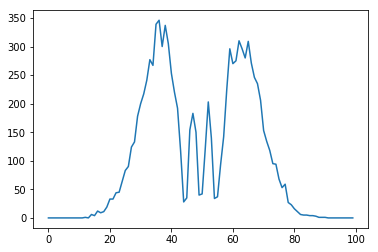

In [3]:
import matplotlib.pyplot as plt

counter=np.zeros((100))
for i in range(10000):
    counter[int(50+(mcmc_normal(np.array([0.,0.5,-0.5]))*10))] += 1

plt.plot(counter)
plt.show()